<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Models" data-toc-modified-id="Models-1">Models</a></span><ul class="toc-item"><li><span><a href="#A-Simple-Model" data-toc-modified-id="A-Simple-Model-1.1">A Simple Model</a></span></li><li><span><a href="#Loss-Function-Intuition" data-toc-modified-id="Loss-Function-Intuition-1.2">Loss Function Intuition</a></span></li></ul></li></ul></div>

In [1]:
# HIDDEN
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import nbinteract as nbi

sns.set()
sns.set_context('talk')
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

## Models

In the United States, many diners will leave a tip for their waiter or waitress as the diners pay for the meal. Although it is customary to offer $15\%$ of the total bill as tip, perhaps some restaurants have more generous patrons than others.

One particular waiter was so interested in how much tip he could expect to get that he collected a simple random sample of information about the tables he served.

In [38]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
...,...,...,...,...,...,...,...
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


We can plot a histogram of the tip amounts:

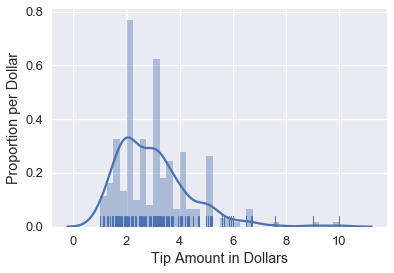

In [19]:
sns.distplot(tips['tip'], bins=np.arange(0, 10.1, 0.25), rug=True)
plt.xlabel('Tip Amount in Dollars')
plt.ylabel('Proportion per Dollar');

There are already some interesting patterns in the data. For example, there is a clear mode at $\$2$ and most tips seem to be in multiples of $\$0.50$.

For now, we are most interested in the percent tip: the tip amount divided by the bill amount. We can create a column in our DataFrame for this variable and show its distribution.

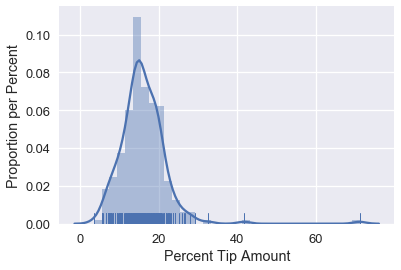

In [21]:
tips['pcttip'] = tips['tip'] / tips['total_bill'] * 100
sns.distplot(tips['pcttip'], rug=True)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

It looks like one table left our waiter a tip of $70\%$! However, most of the tips percentages are under $30\%$. Let's zoom into that part of the distribution.

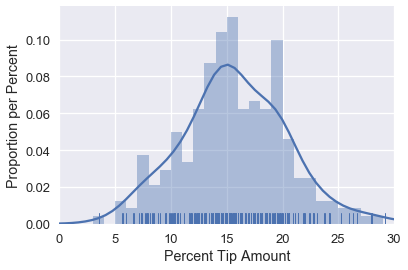

In [25]:
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)
plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

We can the distribution is roughly centered at $15\%$ with another potential mode at $20\%$. Suppose our waiter is interested in predicting how much percent tip he will get from a given table. To address this question, we can create a model for how much tip the waiter will get.

### A Simple Model

The simplest model possible is to completely ignore the data and state that since the convention in the U.S. is to give $15\%$ tip, the waiter will always get $15\%$ tip from his tables. While simple, let's use this model to define some variables that we'll use later on.

This model assumes that there is one true percentage tip that all tables, past and future, will give the waiter. This is the *population parameter* for the percent tip, which we will denote by $ \theta^* $.

After making this assumption, our model then says that our guess for $ \theta^* $ is $ 15\% $.

This model is obviously wrong—if the model were accurate, every table in our dataset should have given the waiter exactly $15\%$ tip. However, this model will probably make a reasonable guess for most scenarios. In fact, if we had no data on previous tables and their percent tips this model would be a good choice. Still, the question remains: what if $10\%$ is a better estimate? Or $20\%$? Without data, we are mostly limited to blind guesses.

However, since our waiter's dataset was sampled at random from our population of interest, our sample will likely resemble the population. This key insight allows us to use our sample to evaluate the accuracy of our model. In particular, we can use the sample of tip percentages to decide whether $10\%$, $15\%$, $20\%$, or some other percent is the best choice for our estimate of $ \theta^* $, which we represent as $\theta$.

### Loss Function Intuition

The distribution of tip percents from our dataset is replicated below for convenience.

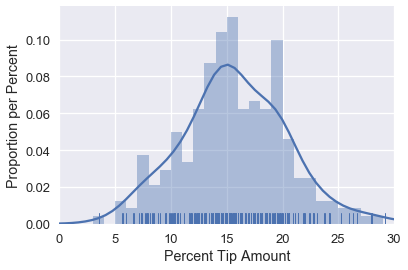

In [26]:
# HIDDEN
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)
plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

Let's suppose we are trying to compare two choices for $\theta$: $10\%$ and $15\%$. We can mark both of these choices on our distribution:

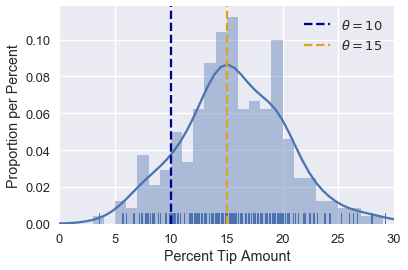

In [37]:
# HIDDEN
sns.distplot(tips['pcttip'], bins=np.arange(30), rug=True)

plt.axvline(x=10, c='darkblue', linestyle='--', label=r'$ \theta = 10$')
plt.axvline(x=15, c='goldenrod', linestyle='--', label=r'$ \theta = 15$')
plt.legend()

plt.xlim(0, 30)
plt.xlabel('Percent Tip Amount')
plt.ylabel('Proportion per Percent');

Intuitively, it looks like choosing $ \theta = 15 $ makes more sense than $ \theta = 10 $ given our dataset. Why is this? When we look at the points in our data, we can see that more points fall close to $15$ than they do to $10$.

Although in this case it is clear that $ \theta = 15 $ is a better choice than $ \theta = 10 $, it is not so clear whether $ \theta = 15 $ is a better choice than $ \theta = 16 $. By assigning a specific number that measures how "good" a given choice of $ \theta $ is, we make precise choices between different values of $ \theta $. This is a mathematical function that takes in a value of $ \theta $ and the points in our dataset, outputting a single number that we will use to select the best value of $ \theta $ that we can.

We call this function a *loss function*.